In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
dire = {'up': 1,'down': -1, 'nan':0,'data':0,'none':3,'both':2,'flat':4} #none= narrow sideways, both=wide sideways
def wwma(values, n):
    """
     J. Welles Wilder's EMA 
    """
    return values.ewm(alpha=1/n, adjust=False).mean()

def atr_percent(df, n=14):
    data = df.copy()
    high = data.High
    low = data.Low
    close = data.Close
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)/close.shift()
    atr = wwma(tr, n)
    return atr

pd.options.display.float_format = '{:,.3f}'.format


In [386]:
ret=pd.DataFrame()
n=0
f=1
inputs= {}
for f in range(1,14):
    tinputs = pd.read_excel('hs20210214-100-3y-'+str(f)+'.xls',sheet_name=None)#load multiple sheets in a dict
    inputs.update(tinputs)
symbols1 = list(inputs.keys())
#[plt.plot(folio1[x]['Close'][:60]) for x in symbols]
print(symbols1)

['A', 'AA', 'AAL', 'AAP', 'AAPL', 'AAT', 'AAVVF', 'AB', 'ABB', 'ABC', 'ABM', 'ABMD', 'ABT', 'ACAD', 'ACB', 'ACCO', 'ACDVF', 'ACGL', 'ACH', 'ACHC', 'ACLLF', 'ACN', 'ACOR', 'ADBE', 'ADES', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'ADUS', 'ADXS', 'AEE', 'AEM', 'AEP', 'AERO', 'AES', 'AETUF', 'AFL', 'AGCO', 'AGI', 'AGIO', 'AGNC', 'AIG', 'AIMFF', 'AIR', 'AIV', 'AIZ', 'AKAM', 'AL', 'ALB', 'ALGN', 'ALK', 'ALKS', 'ALL', 'ALNY', 'ALSN', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMED', 'AMG', 'AMGN', 'AMMJ', 'AMN', 'AMOV', 'AMP', 'AMSC', 'AMT', 'AMX', 'AMYZF', 'AMZN', 'AN', 'ANCUF', 'ANDE', 'ANF', 'ANGI', 'ANGO', 'ANIK', 'ANSS', 'ANTE', 'ANTM', 'AON', 'APA', 'APD', 'APH', 'APHA', 'AQN', 'ARCC', 'ARNA', 'ARNC', 'ARWR', 'ASML', 'ASND', 'ASRT', 'ATGE', 'ATGFF', 'ATI', 'ATO', 'ATSG', 'ATTBF', 'ATUSF', 'ATVI', 'AUOTY', 'AUY', 'AVA', 'AVB', 'AVD', 'AVGO', 'AVNT', 'AVY', 'AWR', 'AXAS', 'AXDX', 'AXGN', 'AXIM', 'AXL', 'AXON', 'AXP', 'AZN', 'AZO', 'BA', 'BABA', 'BAC', 'BAM', 'BAX', 'BB', 'BBBY', 'BBU', 'BBY', 'BC', 'BCE',

In [387]:
#print(symbols1)
#tinputs
#symbols1 = ['SQ']
#inputs['AD']

In [388]:
folio1 = {}
for e in symbols1:
    #i = pd.DataFrame()
    #i = inputs[e][['Date']]#pd.to_datetime(inputs[e]['Date']).copy()
    i = inputs[e][['Date','sDiff', 'mDiff', 'lDiff', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()
    i['pHigh'] = inputs[e]['pHigh'].shift(-1)
    i['pLow']  = inputs[e]['pLow'].shift(-1)
    i['nni'] = [dire[str(item)] for item in inputs[e]['NI']] 
    i = i.sort_values('Date',ascending=True)
    i = i.reset_index(drop=True)
    i['Date'] = pd.to_datetime(i['Date'])
    i.fillna(0)
    i['atrpct'] = atr_percent(i)
    folio1[e]=i
print(list(i.keys()))
print(len(folio1))
#plt.figure(figsize=(20,10))
#plt.plot(ret)
#plt.legend(symbols1,loc='upper left')
#plt.show()

['Date', 'sDiff', 'mDiff', 'lDiff', 'Open', 'High', 'Low', 'Close', 'Volume', 'pHigh', 'pLow', 'nni', 'atrpct']
1271


In [389]:
folio=folio1
symbols=symbols1
#pd.options.display.float_format = '${:,.2f}'.format
print(symbols)

['A', 'AA', 'AAL', 'AAP', 'AAPL', 'AAT', 'AAVVF', 'AB', 'ABB', 'ABC', 'ABM', 'ABMD', 'ABT', 'ACAD', 'ACB', 'ACCO', 'ACDVF', 'ACGL', 'ACH', 'ACHC', 'ACLLF', 'ACN', 'ACOR', 'ADBE', 'ADES', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'ADUS', 'ADXS', 'AEE', 'AEM', 'AEP', 'AERO', 'AES', 'AETUF', 'AFL', 'AGCO', 'AGI', 'AGIO', 'AGNC', 'AIG', 'AIMFF', 'AIR', 'AIV', 'AIZ', 'AKAM', 'AL', 'ALB', 'ALGN', 'ALK', 'ALKS', 'ALL', 'ALNY', 'ALSN', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMED', 'AMG', 'AMGN', 'AMMJ', 'AMN', 'AMOV', 'AMP', 'AMSC', 'AMT', 'AMX', 'AMYZF', 'AMZN', 'AN', 'ANCUF', 'ANDE', 'ANF', 'ANGI', 'ANGO', 'ANIK', 'ANSS', 'ANTE', 'ANTM', 'AON', 'APA', 'APD', 'APH', 'APHA', 'AQN', 'ARCC', 'ARNA', 'ARNC', 'ARWR', 'ASML', 'ASND', 'ASRT', 'ATGE', 'ATGFF', 'ATI', 'ATO', 'ATSG', 'ATTBF', 'ATUSF', 'ATVI', 'AUOTY', 'AUY', 'AVA', 'AVB', 'AVD', 'AVGO', 'AVNT', 'AVY', 'AWR', 'AXAS', 'AXDX', 'AXGN', 'AXIM', 'AXL', 'AXON', 'AXP', 'AZN', 'AZO', 'BA', 'BABA', 'BAC', 'BAM', 'BAX', 'BB', 'BBBY', 'BBU', 'BBY', 'BC', 'BCE',

1271


<ipython-input-390-f375b3a0ce0f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['returns'][i.pHigh<i.High] = i.pHigh-i.Open #profit target
<ipython-input-390-f375b3a0ce0f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['returns'][i.Close<i.pLow] = i.pLow-i.Open  #stoploss
<ipython-input-390-f375b3a0ce0f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['returns'][i.Open>i.pHigh] = 0 #no trade
<ipython-input-390-f375b3a0ce0

# selected:  0
     symbol  sharpe   total  totalBH    pf nwin nloose  tprofit   tloss   lastp
747    MORN   6.237 155.827  152.990 2.688  202    103  248.132 -92.304 244.010
1065    STN   5.631  24.555   10.320 2.273  203    109   43.843 -19.288  37.910
414    EXPD   5.529  67.168   33.460 2.310  182    112  118.297 -51.209  95.620
96     ATGE   5.501  50.179   -5.690 2.209  210    109   89.476 -40.507  40.480
809   NSANY   5.211  12.196   -8.670 2.800  130     84   18.276  -6.527  12.020
...     ...     ...     ...      ...   ...  ...    ...      ...     ...     ...
1201   VXRT  -2.105   1.515   -0.540 0.625  110    157   11.275 -18.051   8.350
910   PREKF  -2.114   0.000      nan 0.613   53     93    5.359  -8.737   9.180
405    EVIO  -2.162   0.351   -1.740 0.633  112    143    2.126  -3.360   0.008
198    CANN  -2.204   0.000   -2.860 0.583   83     87    4.544  -7.793   1.240
87     APHA  -2.234  -0.000    4.590 0.613  104    137   17.140 -27.974  14.560

[1271 rows x 10 columns]

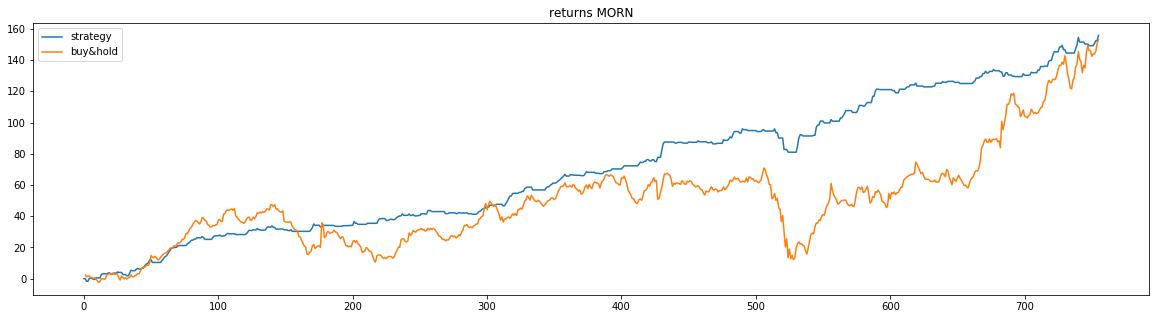

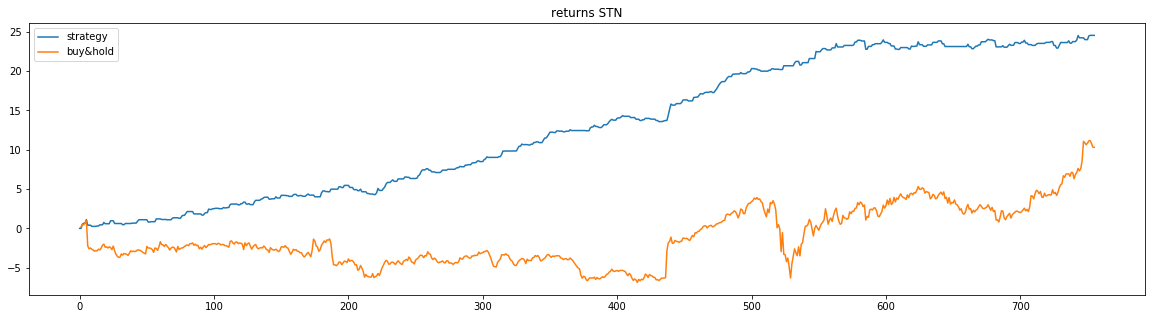

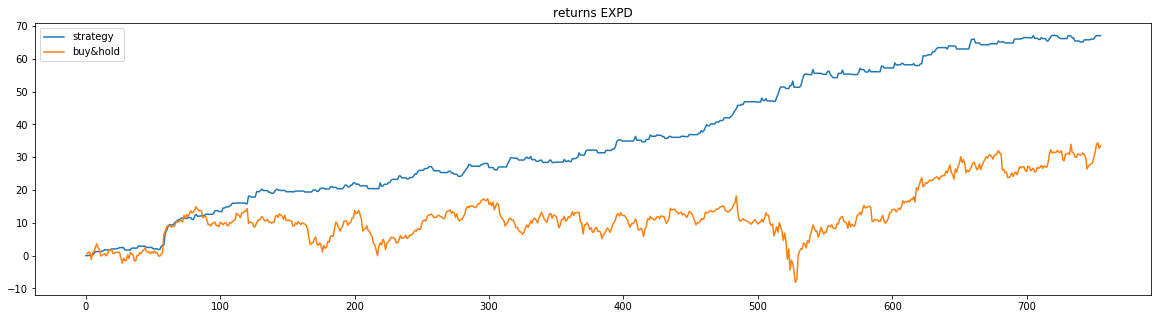

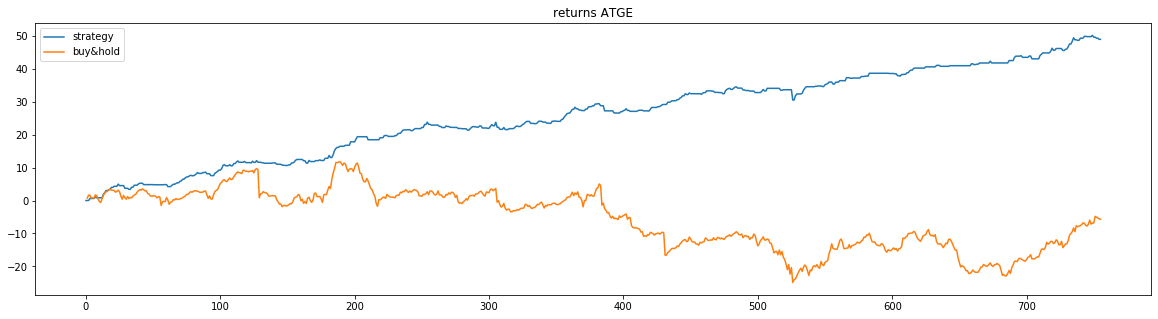

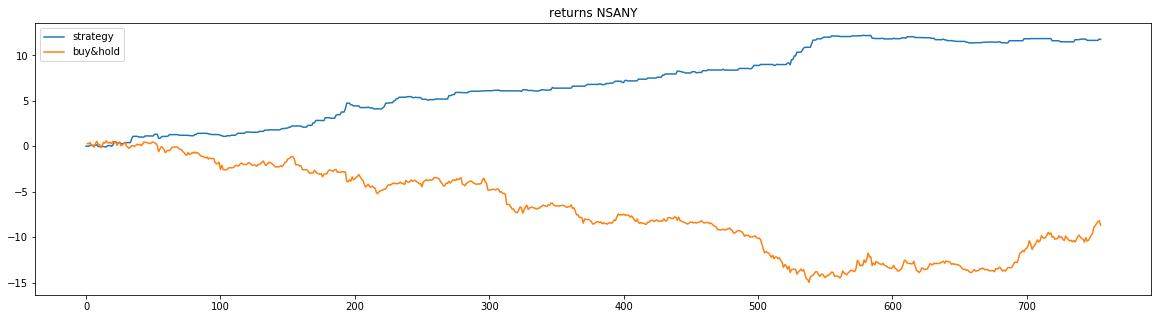

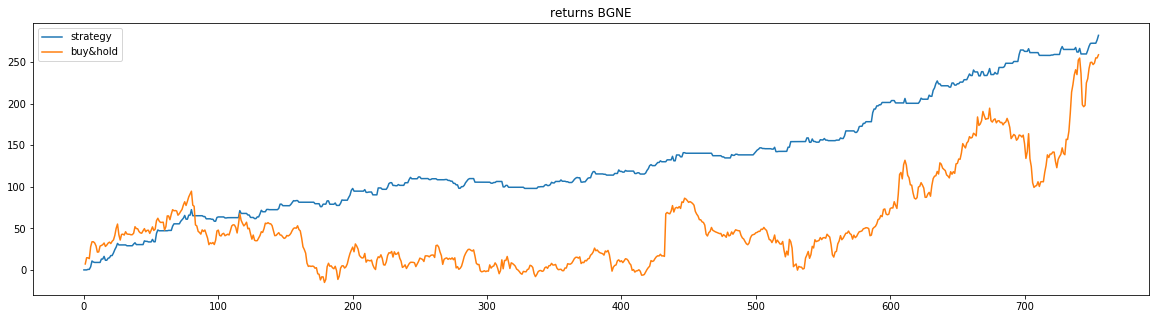

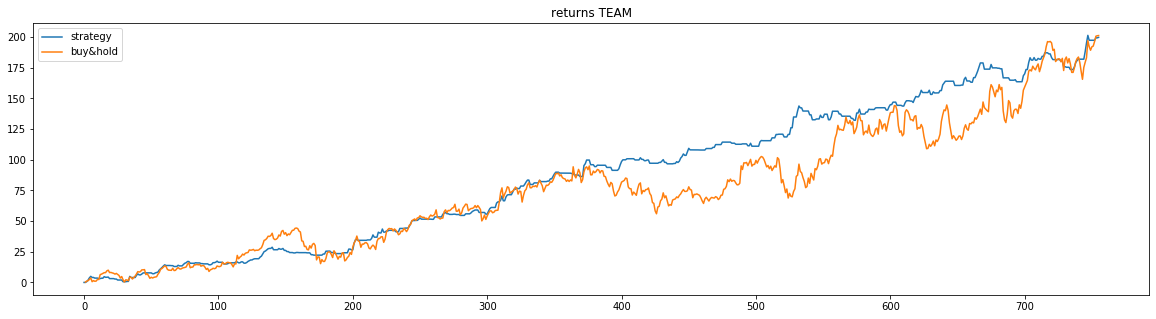

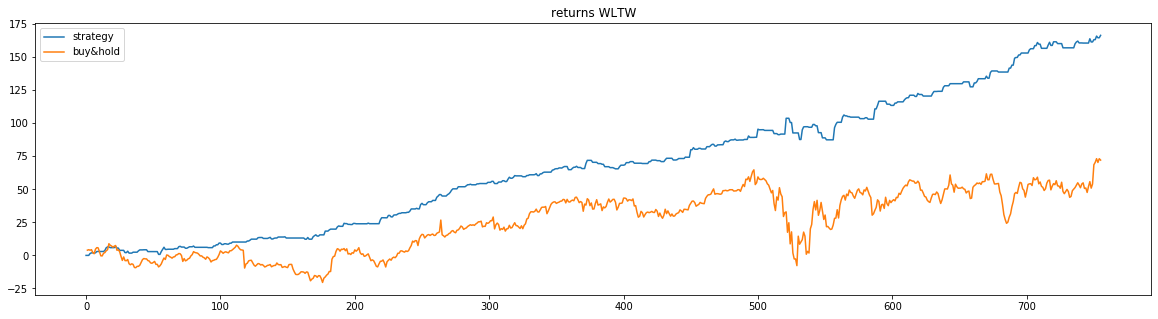

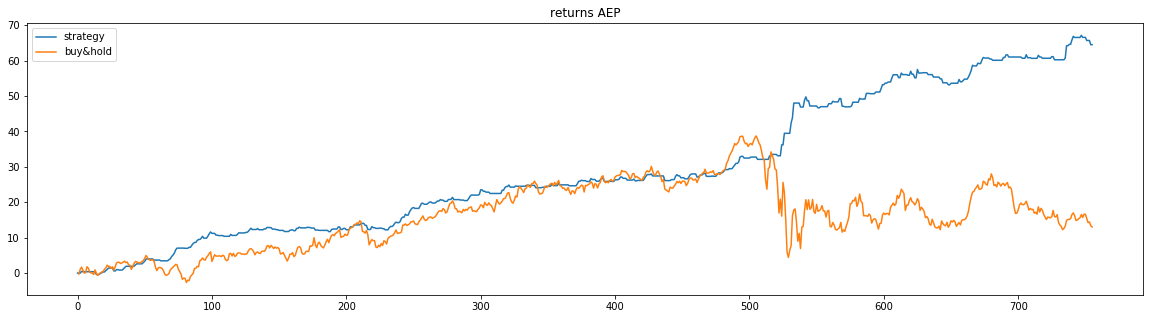

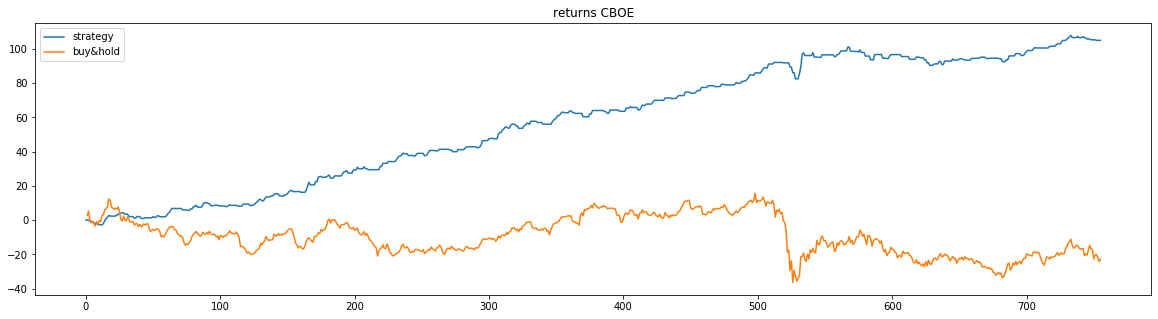

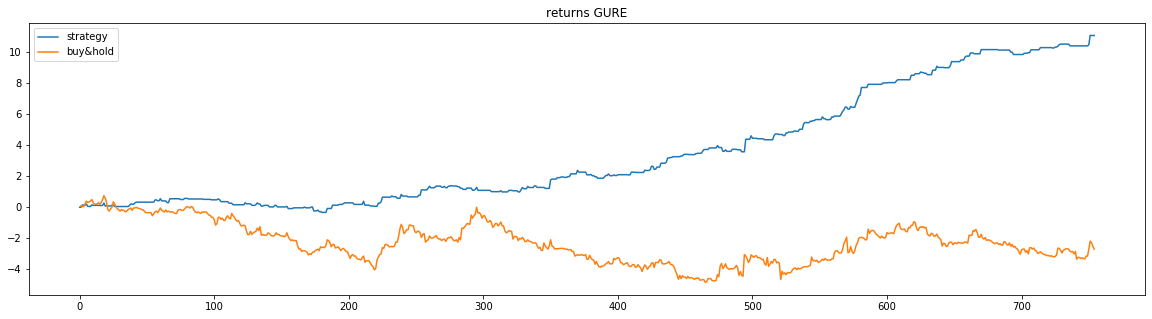

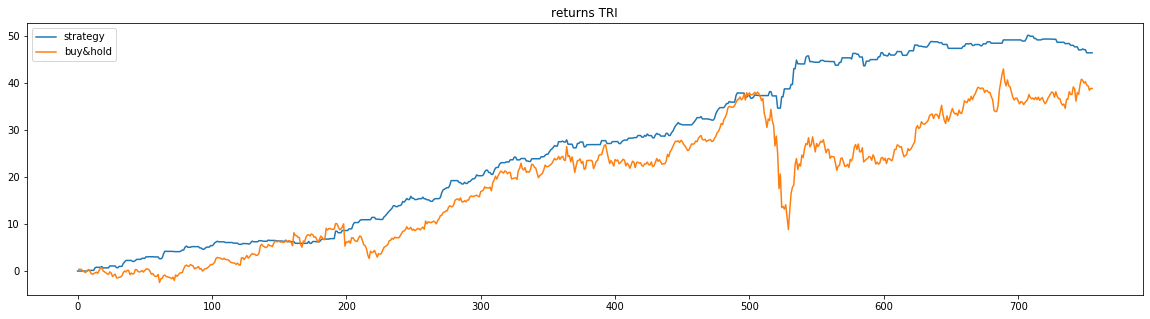

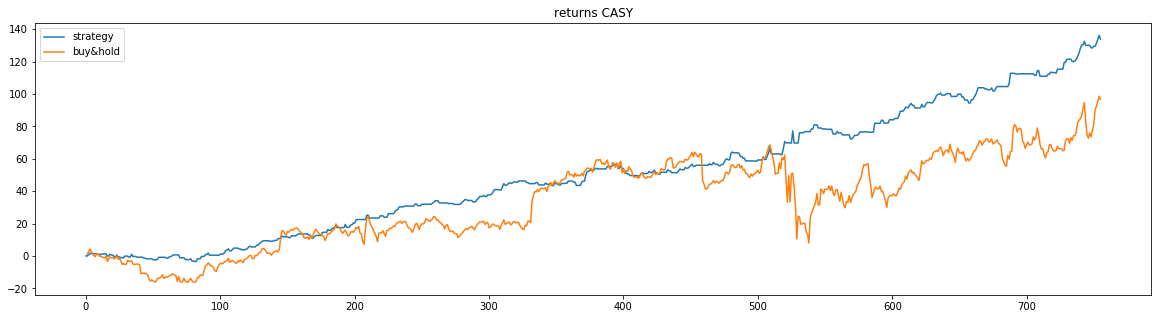

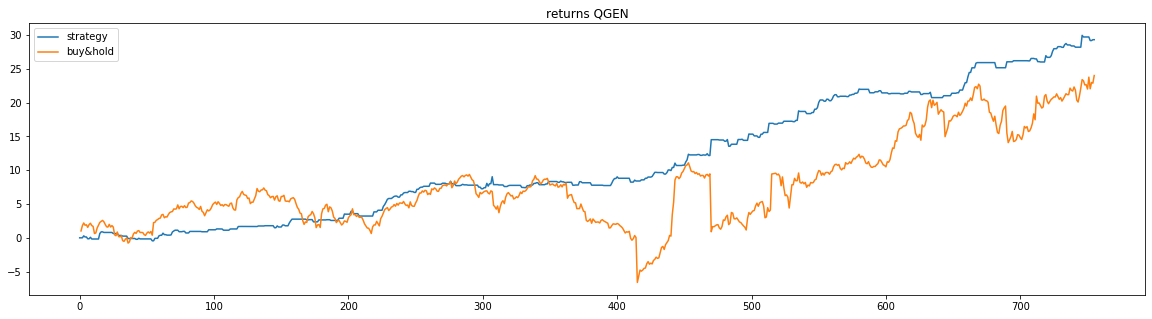

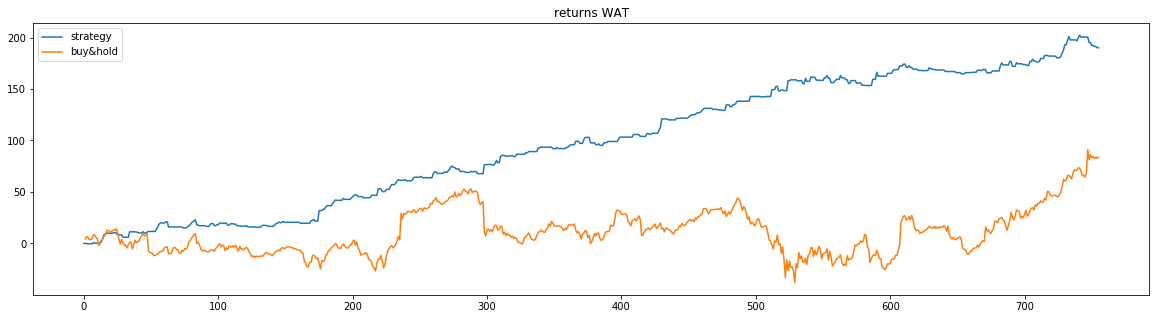

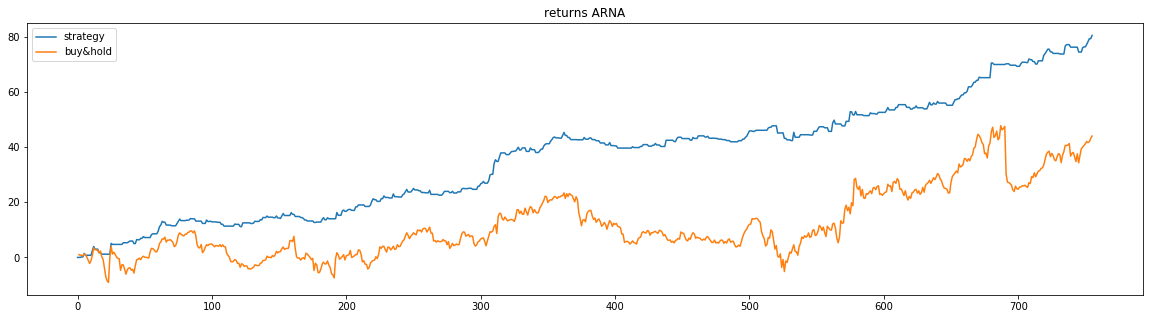

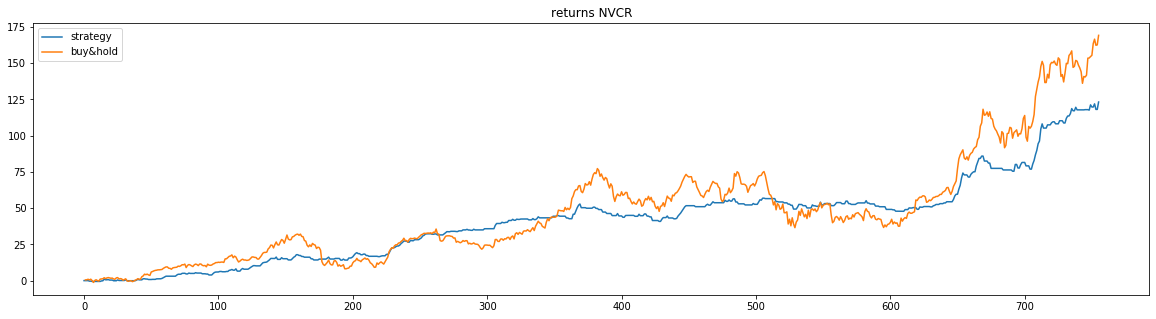

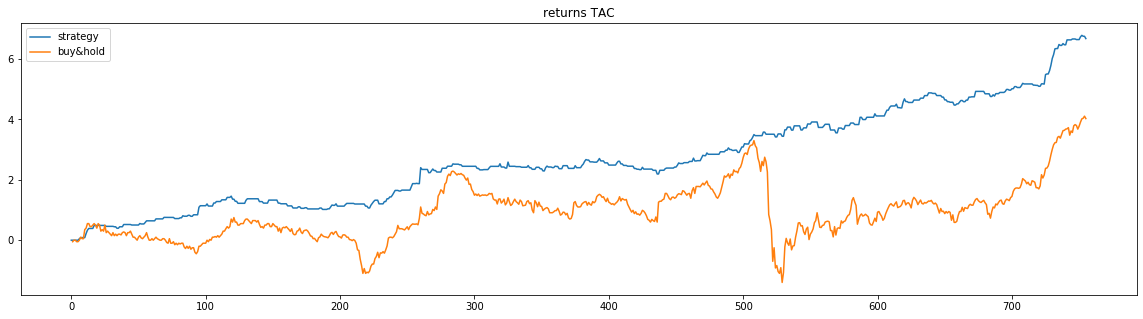

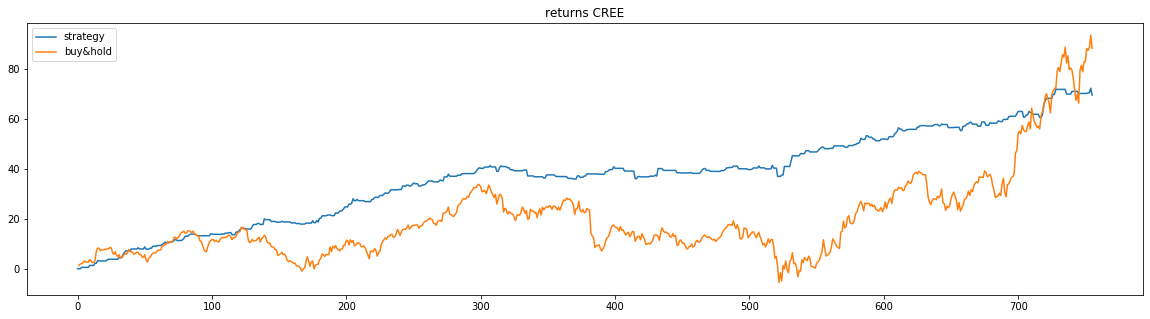

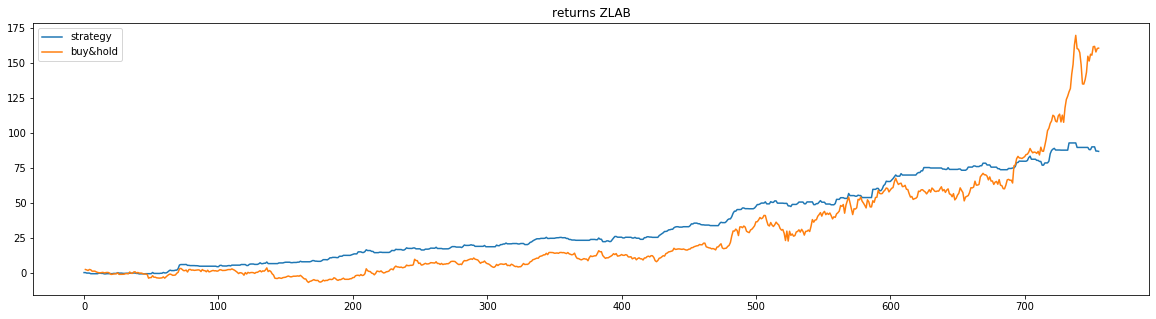

In [390]:
plot=True
n=0
strategy = pd.DataFrame()
strategyDaily = pd.DataFrame()
dayReturnPercent = pd.DataFrame()
buyHold= pd.DataFrame()
print(len(symbols))
pffilterlist={}
starSymbols1=[]
outSymbols1=[]
raw_stats=pd.DataFrame(columns=('symbol', 'sharpe', 'total','totalBH','pf','nwin','nloose','tprofit','tloss','lastp'))
#symbols = symbols[:100]
for s in symbols:
    i = folio[s]#.copy()
    i['pdHigh'] = i.pHigh-i.High
    i['pdLow'] = i.pLow-i.Low
    i['pdHighpct'] = i.pdHigh/i.High
    i['pdLowpct'] = i.pdLow/i.Low
    i['dd'] = i.pLow-i.Low
    i['pRange'] = i.pHigh-i.pLow
    i['nul'] = i.pHigh
    i.nul = 0
    i['returns'] = (i.Close-i.Open)
    i['returns'][i.pHigh<i.High] = i.pHigh-i.Open #profit target
    i['returns'][i.Close<i.pLow] = i.pLow-i.Open  #stoploss
    #i['returns'][i.Low<i.pLow] = i.pLow-i.Open  #stoploss
    i['returns'][i.Open>i.pHigh] = 0 #no trade
    i['returns'][i.Open<i.pLow] = i.Close-i.Open
    #i['returns'] = i.Close[i.pHigh>i.High]-i.Open
    #i['returns'] = i.pHigh-i.Open
    #i['returns'] = (i.High.diff())
    #i['returns'] = (i.Close.diff())
    i['upRange'] = i.pHigh-i.Open
    i['dnRange'] = i.pLow-i.Open
    i['HiRange'] = i.High-i.Open
    i['LoRange'] = i.Low-i.Open
    
    #i[['HiRange','returns','upRange','LoRange','dnRange','nul']][500:].plot(figsize=(50,10),title="daily pRange")

    #i['returns'] = (i.High-i.Low.shift(1))
    #i['rvol'] = i.Volume/i.Volume.rolling(8).mean()
#    trades =   (i.pdLowpct > 0.0) & (i.lDiff > 0.0) #& (i.NI > 0.00) #& (i.Open <= i.pentry) # & (i.NI > 0.00)#  & & (i.rvol > 0.0)(i.NI > 0)  & & (i.ovGappct > 0.00) & (i.ovGappct < 0.04)
    #trades =   (i.pdHighpct > 0.0) &(i.mDiff > 0.0)& (i.NI > 0.00) #& (i.NI > 0.00) #& (i.Open <= i.pentry) # & (i.NI > 0.00)#  & & (i.rvol > 0.0)(i.NI > 0)  & & (i.ovGappct > 0.00) & (i.ovGappct < 0.04)
    #trades =  (i.pLow.diff() > 0.00) &(0.6*(i.pHigh-i.pLow)+i.pLow > i.Close.shift(1))
    trades = i.Low
    trades = np.NaN
    trades =  (i.pHigh.diff() > 0)  &(i.Open < i.pHigh-i.pRange/4) # &(i.nni.shift(2) < 0.00)# &(i.pHigh > i.Close.shift(1)) &(i.pLow>i.Low.shift(1))
    i['trades']=trades
    #i[['pHigh','Open','High','Close']][500:].plot(figsize=(50,10),title="predict")

    hcorr  =   (i.pHigh.diff() > 0.00) & (i.High.diff() > 0.00)#& (i.returns > 0.00)# & (i.High.diff() > 0.00)
    fhcorr =   (i.pHigh.diff() > 0.00) & (i.High.diff() < 0.00)#& (i.returns < 0.00)# & (i.High.diff() < 0.00)
    lcorr  =   (i.pLow.diff()  > 0.00) & (i.Low.diff()  > 0.00)#& (i.returns > 0.00)#
    flcorr =   (i.pLow.diff()  > 0.00) & (i.Low.diff()  < 0.00)#& (i.returns < 0.00)#& (i.Low.diff() < 0.00)
    #print(s,' high ',hcorr.sum(),' ',fhcorr.sum(),'correlation: ',hcorr.sum()/fhcorr.sum(), 'low ',lcorr.sum(),' ',flcorr.sum(),' correlation: ',lcorr.sum()/flcorr.sum())

    i['trades'] = trades
    dailyReturns = i.returns * trades
    i[s]=dailyReturns
    
    strategyDaily[s] = dailyReturns
    strategy[s]      = dailyReturns.cumsum()
    buyHold[s]       = i.Close.diff().cumsum()
    
    sharpe  = dailyReturns.mean()/dailyReturns.std()
    sharpe  = sharpe*(len(dailyReturns)**0.5) #annual
    total   = strategy[s].max() #dailyReturns.sum()
    totalBH = buyHold[s].iat[-1]
    nloose  = (dailyReturns <0).sum()
    nwin    = (dailyReturns >0).sum()
    tprofit = (dailyReturns*(dailyReturns >0)).sum()
    tloss   = (dailyReturns*(dailyReturns <0)).sum()
    lastp    = i.Low.iat[-1]
    pf=0
    if nloose != 0:
        pf = tprofit/abs(tloss)
    else:
        pf = 100
    row=[s,sharpe,total,totalBH,pf,nwin,nloose,tprofit,tloss,lastp]
    raw_stats.loc[n]=row
    n=n+1
#strategy[500:].plot(figsize=(50,10),title="cummulative returns")
#strategyDaily[500:].plot(figsize=(50,10),title="daily profits")
print('# selected: ',len(starSymbols1))
sh=raw_stats.sort_values(['sharpe','total'],ascending=False)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 11,'display.width',140):  # more options can be specified also
    print(sh)
n=0
if True:
    for x in sh['symbol']:
        if n<20:
            n=n+1
            plt.figure(figsize=(20,5))
            plt.title('returns '+x)
            plt.plot(strategy[x], label="strategy")
            plt.plot(buyHold[x], label="Buy&Hold")
            plt.legend(['strategy','buy&hold'])
            plt.show()
pd.option_context('display.max_rows', 100, 'display.max_columns', 26,'display.width',240)            
#folio[symbols[0]].tail(40)

In [391]:
#s=stats.sort_values(['nwin'],ascending=False)[:int(len(stats)/4)]
#s.symbol
stats=raw_stats.loc[(raw_stats.lastp<2000) & (raw_stats.lastp>5),:]
print(stats.lastp.mean())
stats.sort_values('lastp')


102.44545465573488


,symbol,sharpe,total,totalBH,pf,nwin,nloose,tprofit,tloss,lastp
586,INM,1.681,18.247,-26.020,1.527,115,76,50.642,-33.155,5.010
178,BSMX,2.292,4.054,-2.240,1.390,151,141,13.344,-9.598,5.030
769,MUFG,1.929,1.395,-2.020,1.448,125,100,4.134,-2.854,5.070
1157,UEPS,0.339,1.396,-4.380,1.064,156,156,13.852,-13.024,5.070
155,BKD,1.814,5.701,-4.210,1.302,168,167,22.820,-17.528,5.105
...,...,...,...,...,...,...,...,...,...,...
764,MTD,3.242,529.094,606.970,1.727,167,121,"1,209.561",-700.270,"1,199.910"
271,CNSWF,3.966,"1,083.165",631.850,2.211,141,118,"1,885.462",-852.785,"1,259.700"
1009,SHOP,2.439,411.082,"1,329.430",1.532,177,101,"1,032.244",-673.736,"1,431.390"
259,CMG,3.305,506.014,"1,276.370",1.829,157,103,"1,076.318",-588.373,"1,522.000"


position per day #  230


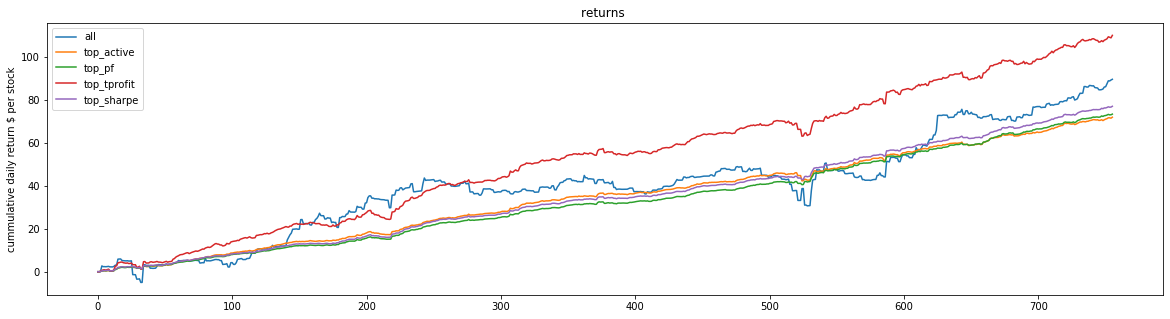

In [392]:
dailyReturn = pd.DataFrame()
days=[]
percentile =0.20
for x in range(0,len(strategy)):
    yst = strategyDaily.loc[x,:]
    #print(yst,yst.sum())
    row = len(dailyReturn)
    dailyReturn.loc[row,'all']=strategyDaily.loc[x,symbols].sum()/len(strategyDaily.columns)
    dailyReturn.loc[row,'top_active']=strategyDaily.loc[x,stats.sort_values(['nwin'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    dailyReturn.loc[row,'top_pf']=strategyDaily.loc[x,stats.sort_values(['pf'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    dailyReturn.loc[row,'top_tprofit']=strategyDaily.loc[x,stats.sort_values(['tprofit'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    dailyReturn.loc[row,'top_sharpe']=strategyDaily.loc[x,stats.sort_values(['sharpe'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    #dailyReturn.loc[row,'bot_loss']=strategyDaily.loc[x,stats.sort_values(['tloss'],ascending=True)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
dailyReturn.fillna(0)
plt.figure(figsize=(20,5))
plt.title('returns ')
plt.plot(dailyReturn['all'].cumsum(), label="all")
#plt.plot(dailyReturn['stars'].cumsum(), label="stars")
plt.plot(dailyReturn['top_active'].cumsum(), label="top_active")
plt.plot(dailyReturn['top_pf'].cumsum(), label="top_pf")
plt.plot(dailyReturn['top_tprofit'].cumsum(), label="top_tprofit")
plt.plot(dailyReturn['top_sharpe'].cumsum(), label="top_sharpe")
#plt.plot(dailyReturn['bot_loss'].cumsum(), label="bot_loss")
plt.ylabel("cummulative daily return $ per stock")
plt.legend()
days
dailyReturn
print ('position per day # ',int(len(stats)*percentile))

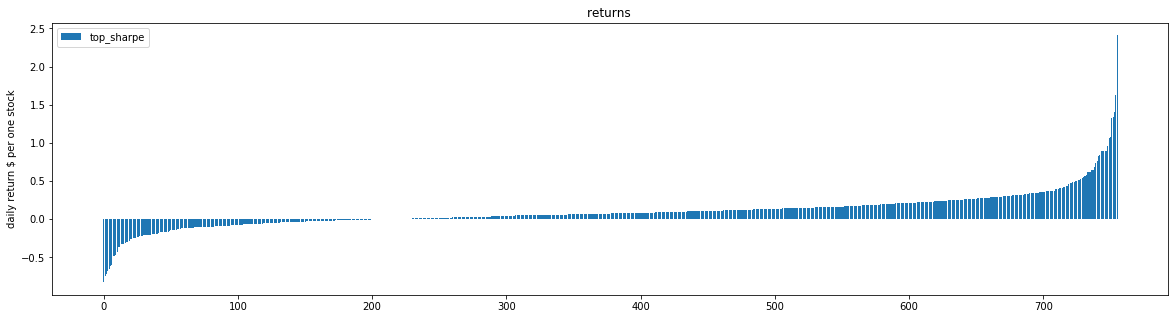

In [393]:
plt.figure(figsize=(20,5))
plt.title('returns ')

which = 'top_sharpe'
dv = dailyReturn.sort_values(which)[which].reset_index(drop=True)
plt.bar(dv.index,dv, label=which)
#plt.plot(dailyReturn['top_sharpe'], label="top_sharpe")
#plt.plot(dailyReturn['bot_loss'], label="bot_loss")
plt.ylabel("daily return $ per one stock")
plt.legend()


Index(['all', 'top_active', 'top_pf', 'top_tprofit', 'top_sharpe'], dtype='object')


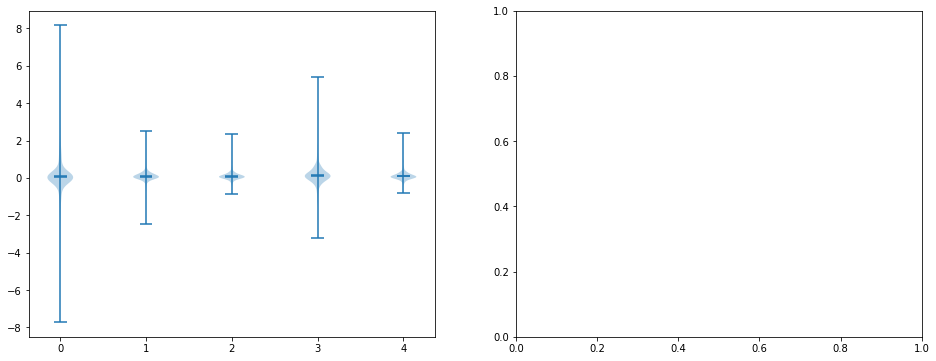

In [394]:
print(dailyReturn.columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax = axes[0].violinplot(dailyReturn.to_numpy(), range(0,len(dailyReturn.columns)), points=len(dailyReturn), widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)

In [395]:
goodboys = stats.sort_values(['sharpe'],ascending=False)[:int(len(stats)*percentile)].symbol.tolist()
print(len(goodboys))
print(goodboys)
%store goodboys

230
['MORN', 'STN', 'EXPD', 'ATGE', 'NSANY', 'BGNE', 'TEAM', 'WLTW', 'AEP', 'CBOE', 'TRI', 'CASY', 'QGEN', 'WAT', 'ARNA', 'NVCR', 'TAC', 'CREE', 'ZLAB', 'LXP', 'TDY', 'AEE', 'ATUSF', 'DKS', 'GIB', 'ARWR', 'MKTX', 'IAC', 'BKR', 'INFO', 'VRSK', 'WTRG', 'POOL', 'OGE', 'ZNGA', 'FAST', 'CZR', 'PCRX', 'AVD', 'EQC', 'CTXS', 'J', 'RBA', 'Z', 'DHR', 'ICLR', 'BIP', 'AUOTY', 'BX', 'CMO', 'OAS', 'JKHY', 'K', 'NDAQ', 'CAGDF', 'CNSWF', 'DLR', 'DISCA', 'LLY', 'ODP', 'WEC', 'PSA', 'SBAC', 'CCEP', 'ARNC', 'XENE', 'ODFL', 'CPRT', 'GL', 'CERN', 'MTZ', 'DUK', 'EW', 'ATO', 'PGR', 'ANGO', 'MDRX', 'RCUS', 'SIX', 'NEE', 'IDA', 'CAL', 'RGEN', 'NTIOF', 'FFIV', 'EPC', 'BKE', 'PAYC', 'GWW', 'POR', 'TECH', 'LNDC', 'LDOS', 'AON', 'TNDM', 'LPLA', 'AMED', 'SLGN', 'LYV', 'ACCO', 'XEL', 'BF-B', 'NLOK', 'SGMS', 'EVRG', 'VRSN', 'IBKR', 'CUBE', 'BIG', 'RARE', 'KIM', 'TD', 'ILMN', 'HQY', 'PG', 'XRAY', 'PKI', 'AIG', 'VGR', 'PNW', 'TROW', 'SO', 'STMP', 'IDXX', 'IHC', 'NI', 'AME', 'WMT', 'THS', 'KR', 'BECN', 'RMD', 'POST', 'C

In [396]:
a = stats.sort_values('total')
m = a.query('symbol in @goodboys')
len(m)

230

230

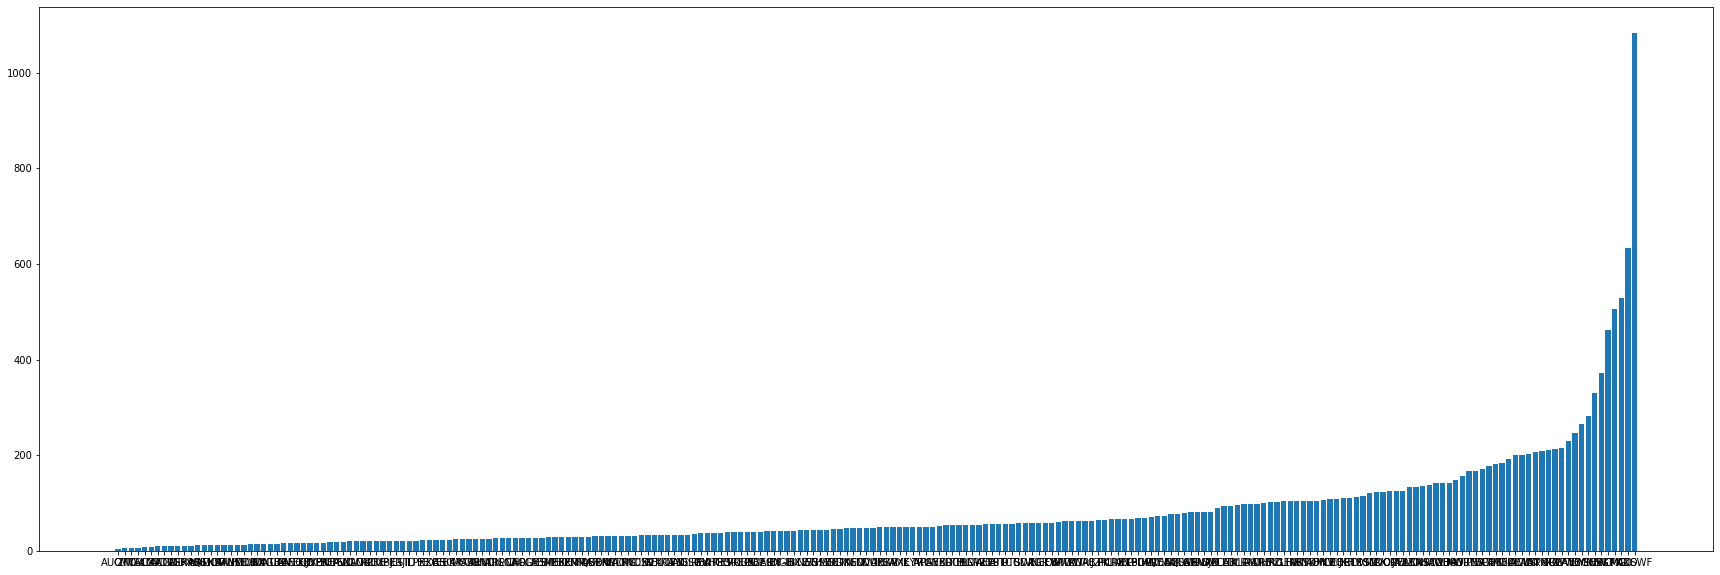

In [397]:

plt.figure(figsize=(30,10))
plt.bar(m.symbol,m.total)
#plt.legend(symbols)
m.columns.tolist()
len(m)

In [398]:
setup = m.symbol.tolist()
print(setup)

['AUOTY', 'CMO', 'ZNGA', 'TAC', 'SLM', 'LXP', 'CODI', 'ACCO', 'ATGFF', 'VGR', 'MDXG', 'HPQ', 'AES', 'LNDC', 'AMOV', 'KIM', 'NSANY', 'ATUSF', 'PWCDF', 'HTLD', 'MDRX', 'NI', 'MAT', 'CAGDF', 'NUAN', 'BCE', 'GNTX', 'ANGO', 'EQC', 'FEYE', 'JNPR', 'XENE', 'BEP', 'OTEX', 'AVD', 'SLGN', 'NLOK', 'ACGL', 'RCI', 'PFE', 'CUBE', 'XPER', 'JCI', 'SJI', 'TD', 'LPX', 'FE', 'EXC', 'OAS', 'BHC', 'EBAY', 'KR', 'MAS', 'STN', 'CIEN', 'ARNC', 'HAIN', 'TRP', 'DISCA', 'LNT', 'CAL', 'HRL', 'OGE', 'CMS', 'ABM', 'BIP', 'MET', 'BKE', 'BKR', 'PNM', 'EMRAF', 'FAST', 'QGEN', 'BRKR', 'ORCL', 'VIAC', 'WTRG', 'RY', 'YNDX', 'CCEP', 'SO', 'XEL', 'NTIOF', 'XRAY', 'GIS', 'AIG', 'YELP', 'DSGX', 'RBA', 'PWR', 'IHC', 'THS', 'POR', 'EVRG', 'RCUS', 'EPC', 'ODP', 'PCAR', 'BECN', 'SIX', 'BF-B', 'GIB', 'BX', 'ICE', 'NEE', 'WNS', 'SGMS', 'HSIC', 'BIG', 'CERN', 'DKS', 'INFO', 'CNC', 'DVA', 'DUK', 'GPC', 'IBKR', 'SWX', 'AME', 'K', 'LYV', 'TRI', 'ATGE', 'PAYX', 'SNBR', 'ED', 'LDOS', 'TEL', 'PG', 'PNW', 'CPRT', 'AEE', 'POST', 'ATO', 'PT

In [385]:
%store setup

Stored 'setup' (list)
